In [1]:
cd ..

/Users/timothychan/marathon/marathon-repo


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import marathon.marathonlib as m

%matplotlib inline

In [3]:
df15 = pd.read_csv('marathon/data/boston2015_clean.csv')
df15.columns

Index([u'marathon', u'year', u'bib', u'url', u'name', u'firstname',
       u'lastname', u'age', u'gender', u'city', u'state', u'country',
       u'citizenship', u'subgroup', u'gunstart', u'starttime', u'time5k',
       u'time10k', u'time15k', u'time20k', u'timehalf', u'time25k', u'time30k',
       u'time35k', u'time40k', u'pace', u'projtime', u'offltime', u'nettime',
       u'overall_rank', u'gender_rank', u'division_rank', u'other1', u'other2',
       u'other3', u'other4'],
      dtype='object')

In [4]:
df15.shape

(26403, 36)

In [5]:
# Look for entries that have been removed by the BAA
ranks = set(df15['overall_rank'])
cheaters = []
for ix in range(1, df15['overall_rank'].max()):
    if ix not in ranks:
        cheaters.append(ix)
print len(cheaters)

196


In [6]:
print " ".join(map(str,cheaters))

126 136 169 358 363 742 811 929 1100 1172 1227 1234 1248 1367 2276 2578 2600 2612 2763 2784 2909 3398 3401 3455 3604 3852 3914 3942 4195 4263 4296 4602 4627 4668 4749 5008 5041 5143 5671 5964 6262 6805 6838 6894 6916 6965 7104 7428 7645 8010 8063 8359 8514 8523 8970 9124 9143 9155 9962 10158 10173 10258 10428 10549 10681 10946 10948 10986 11223 11334 11843 11847 11873 11979 12227 12290 12430 12438 12622 12774 12807 12861 12919 13127 13462 13613 13650 13767 13874 13935 13980 14154 14228 14236 14651 14698 14821 14897 15108 15314 15518 15769 15849 15938 16079 16404 16421 16656 17252 17754 17822 18231 18324 18384 18458 18747 18762 19007 19372 19521 19680 20046 20098 20264 20450 20871 20982 21150 21205 21215 21498 21639 21681 21818 21902 22064 22076 22326 22331 22340 22374 22432 22490 22549 22619 22924 22936 22947 22950 23125 23163 23325 23326 23408 23497 23638 23650 23684 23779 23806 23886 23936 24103 24401 24493 24509 24543 24552 24589 24671 24678 24710 24813 24914 25027 25113 25202 25232

In [7]:
df15['citizenship'].value_counts()

CAN    136
GBR    120
JPN     98
USA     82
IRL     65
MEX     47
AUS     46
GER     40
FRA     36
CHN     33
ITA     20
VEN     18
COL     18
SWE     17
ESP     17
RSA     17
BRA     15
NED     14
PHI     13
NZL     12
BEL     11
SUI      9
IND      9
ARG      9
CRC      8
DEN      7
NOR      7
KOR      7
UKR      6
GUA      6
      ... 
LAT      2
ETH      2
SLO      2
HUN      2
HON      2
ESA      2
PER      2
GUY      1
NGR      1
URU      1
JAM      1
CIV      1
TUR      1
TUN      1
CUB      1
TRI      1
ISL      1
UGA      1
KAZ      1
VIE      1
LIB      1
ERI      1
INA      1
CPV      1
KUW      1
SRI      1
BUL      1
DMA      1
PAR      1
SIN      1
Name: citizenship, dtype: int64

65
64


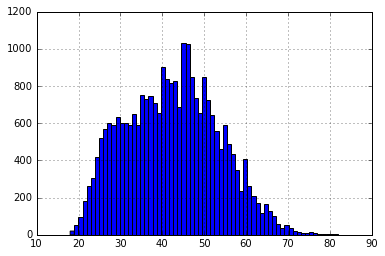

In [8]:
print len(df15['age'].unique())
print df15['age'].max() - df15['age'].min()
df15['age'].hist(bins=65)

In [9]:
df15['age'].value_counts().sort_index()

18      20
19      51
20      94
21     180
22     263
23     303
24     416
25     521
26     568
27     602
28     588
29     636
30     600
31     600
32     588
33     652
34     590
35     751
36     728
37     747
38     710
39     654
40     900
41     839
42     817
43     827
44     688
45    1031
46    1027
47     848
      ... 
53     557
54     462
55     592
56     487
57     433
58     346
59     235
60     406
61     261
62     207
63     172
64     116
65     166
66     130
67     101
68      60
69      35
70      52
71      39
72      20
73      17
74      12
75      11
76      13
77       8
78       4
79       2
80       5
81       2
82       4
Name: age, dtype: int64

In [10]:
df15['gender'].value_counts()

True     14495
False    11908
Name: gender, dtype: int64

[]

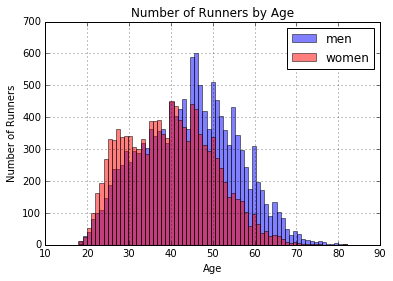

In [11]:
df15[df15['gender']==True]['age'].hist(bins=65, color='b', alpha=0.5)
df15[df15['gender']==False]['age'].hist(bins=65, color='r', alpha=0.5)
plt.legend(['men','women'])
plt.xlabel('Age')
plt.ylabel('Number of Runners')
plt.title('Number of Runners by Age')
plt.plot()

Histogram may be due to:
- interest in the boston marathon differs by gender/age
- BAA.org controls the number of entrants in each category (gender, age by bins)

So is this histogram organic or controlled?

According to BAA.org, qualifying standards are set for age categories.
http://www.baa.org/news-and-press/news-listing/2015/september/2016-boston-marathon-qualifier-acceptances.aspx

    2016 BOSTON MARATHON: Men’s Qualifying Standards and Accepted Times*
    AGE GROUP	QUALIFYING STANDARD	TIMES ACCEPTED**
    18-34	3hrs 05min 00sec	3hrs 02min 32sec
    35-39	3hrs 10min 00sec	3hrs 07min 32sec
    40-44	3hrs 15min 00sec	3hrs 12min 32sec
    45-49	3hrs 25min 00sec	3hrs 22min 32sec
    50-54	3hrs 30min 00sec	3hrs 27min 32sec
    55-59	3hrs 40min 00sec	3hrs 37min 32sec
    60-64	3hrs 55min 00sec	3hrs 52min 32sec
    65-69	4hrs 10min 00sec	4hrs 07min 32sec
    70-74	4hrs 25min 00sec	4hrs 22min 32sec
    75-79	4hrs 40min 00sec	4hrs 37min 32sec
    80 and older	4hrs 55min 00sec	4hrs 52min 32sec

    2016 BOSTON MARATHON: Women’s Qualifying Standards and Accepted Times*
    AGE GROUP	QUALIFYING STANDARD	TIMES ACCEPTED**
    18-34	3hrs 35min 00sec	3hrs 32min 32sec
    35-39	3hrs 40min 00sec	3hrs 37min 32sec
    40-44	3hrs 45min 00sec	3hrs 42min 32sec
    45-49	3hrs 55min 00sec	3hrs 52min 32sec
    50-54	4hrs 00min 00sec	3hrs 57min 32sec
    55-59	4hrs 10min 00sec	4hrs 07min 32sec
    60-64	4hrs 25min 00sec	4hrs 22min 32sec
    65-69	4hrs 40min 00sec	4hrs 37min 32sec
    70-74	4hrs 55min 00sec	4hrs 52min 32sec
    75-79	5hrs 10min 00sec	5hrs 07min 32sec
    80 and older	5hrs 25min 00sec	5hrs 22min 32sec


Let's generate a model to predict a runner's finish time given their age/gender

In [12]:
finish_times = df15[df15['age']==30]['offltime'].values
print max(finish_times)
print min(finish_times)

368.033333333
129.8


239


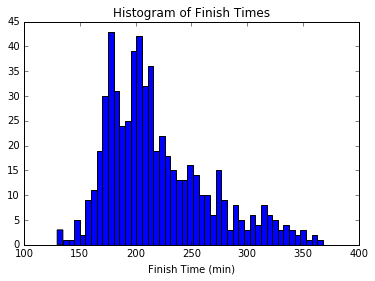

In [13]:
bins = int(max(finish_times) - min(finish_times))+1
print bins
plt.hist(finish_times, bins=bins/5)
plt.title('Histogram of Finish Times')
plt.xlabel('Count')
plt.xlabel('Finish Time (min)')
plt.show()

Ugly distribution, let's try to clean it up

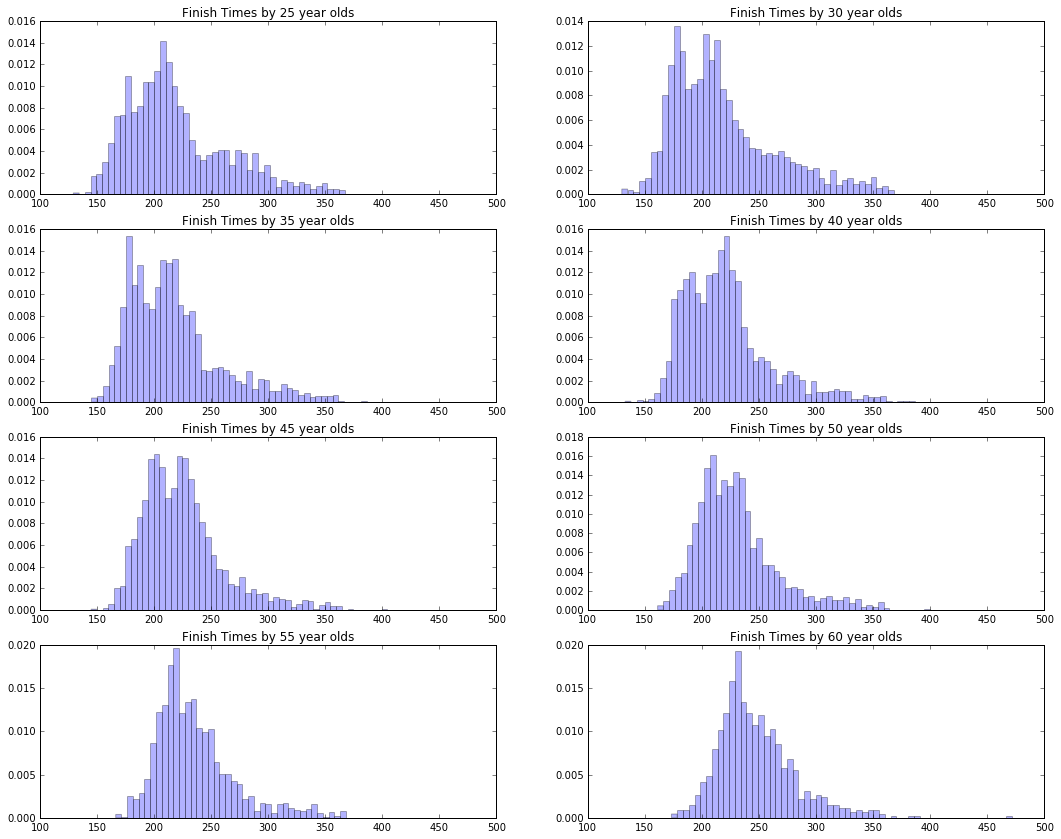

In [14]:
def plot_distribution_of_times(df):
    finish_times = df['offltime'].values
    min_range = int(max(finish_times) - min(finish_times))+1
    plt.hist(finish_times, bins=min_range/5, alpha=0.3, normed=True)
    plt.xlim(100,500)

df = df15
plt.figure(figsize=(18,18))
for ix in range(1,9):
    plt.subplot(520+ix)
    age = 20+5*ix
    plot_distribution_of_times(df[df['age'].isin([age-1,age,age+1])])
    plt.title('Finish Times by '+str(age)+' year olds')
plt.show()

Better.  But earlier ages appear bimodal?  Try splitting on gender.

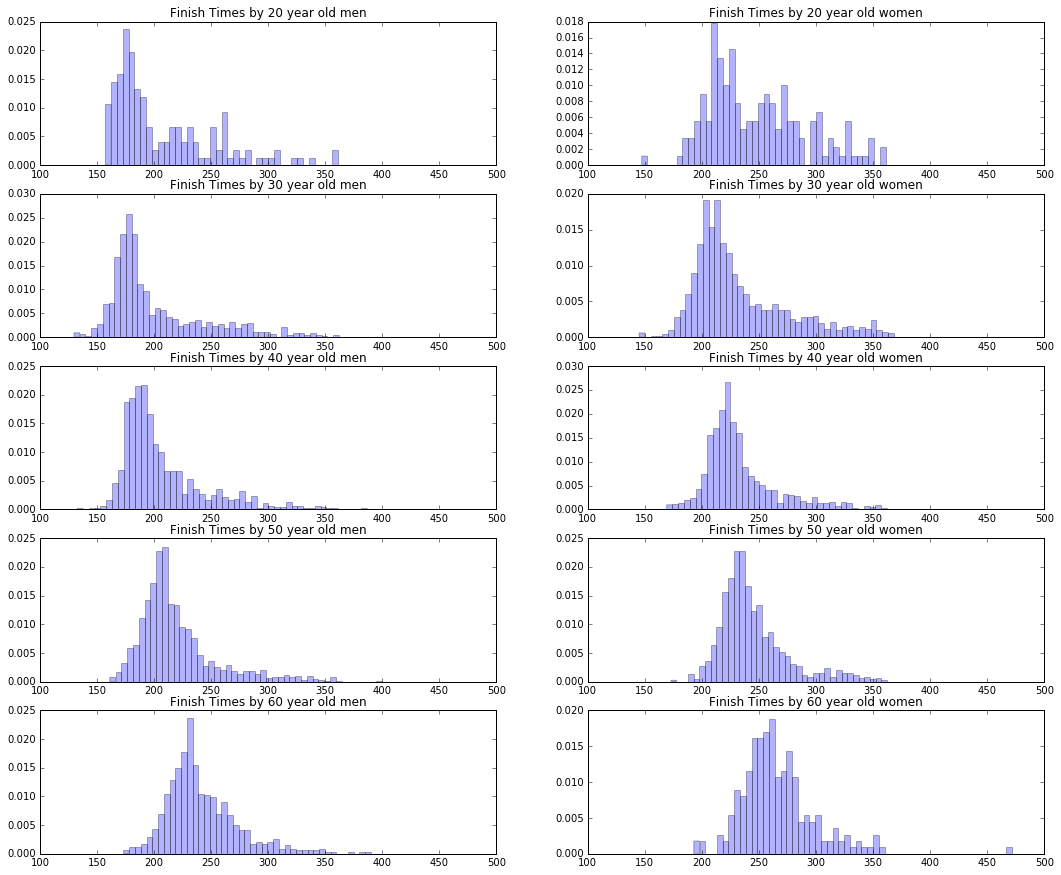

In [15]:
df_m = df15[df15['gender']==True]
df_f = df15[df15['gender']==False]
plt.figure(figsize=(18,18))
for ix in range(0,5):
    plt.subplot(6,2,2*ix+1)
    age = 20+10*ix
    plot_distribution_of_times(df_m[df_m['age'].isin([age-1,age,age+1])])
    plt.title('Finish Times by '+str(age)+' year old men')
    plt.subplot(6,2,2*ix+2)
    plot_distribution_of_times(df_f[df_f['age'].isin([age-1,age,age+1])])
    plt.title('Finish Times by '+str(age)+' year old women')
plt.show()

Looking good.  We should get this data ready a model.  Predict 2015 running times based on profile.

In [16]:
# Labels
y = df15['offltime']
print y[0:5]
mean = sum(y)/float(len(y))
print m.time_to_timestring(mean), mean
print min(y), max(y)

0    180.050000
1    188.200000
2    194.833333
3    211.100000
4    175.650000
Name: offltime, dtype: float64
3:46:20 226.339677309
129.283333333 486.016666667


## Features I'm considering
| feature | comment |
|---------|---------|
| bib | integer, need to strip 'F' from female pros
| age | integer
| gender | boolean
| origin | categorical, merge of state/country.  Count values and merge misc. categories
| citizenship | explore significance/possibilities

## Other Features (mostly for fun)
| feature | comment |
|---------|---------|
| has_url | boolean
| num_punctuations | integer, count of punctuations in name
| len_firstname | integer
| len_lastname | integer
| last_initial | categorical in {A,B,...,Z}

In [17]:
df15.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26403 entries, 0 to 26402
Data columns (total 36 columns):
marathon         0 non-null float64
year             0 non-null float64
bib              26403 non-null object
url              26403 non-null object
name             26403 non-null object
firstname        26403 non-null object
lastname         26403 non-null object
age              26403 non-null int64
gender           26403 non-null bool
city             26403 non-null object
state            23876 non-null object
country          26403 non-null object
citizenship      1060 non-null object
subgroup         67 non-null object
gunstart         26403 non-null int64
starttime        26403 non-null int64
time5k           26403 non-null float64
time10k          26403 non-null float64
time15k          26403 non-null float64
time20k          26403 non-null float64
timehalf         26403 non-null float64
time25k          26403 non-null float64
time30k          26403 non-null float64
ti

In [18]:
print df15['bib'].min()
print df15['bib'].max()

1
F9


In [19]:
for bib in df15['bib']:
    try:
        int(bib)
    except:
        print bib, 

F22 F111 F112 F41 F8 F16 F106 F1 F6 F2 F21 F5 F23 F4 F107 F28 F104 F119 F39 F113 F3 F109 F30 F9 F32 F10 F116 F42 F31 F14 F18 F101 F37 F24 F25 F102 F40 F33 F11 F110 F115 F36 F38 F29 F114 F27 F108 F105 F34


In [20]:
print df15['age'].min()
print df15['age'].max()
print df15['age'].mean()
print df15['age'].median()

18
82
42.1682763322
42.0


In [21]:
df15['state'].value_counts().head(10)

MA    4627
CA    1940
NY    1391
ON     976
TX     951
PA     915
IL     878
OH     782
VA     665
MI     637
Name: state, dtype: int64

In [22]:
df15['state'].value_counts().tail(10)

SK    18
PR    15
PE    11
AE     6
AA     3
YT     3
AP     2
NT     2
GU     2
VI     1
Name: state, dtype: int64

In [23]:
len(df15['state'].value_counts())

69

In [24]:
sum(df15['state'].isnull())

2527

In [25]:
df15[df15['state'].isnull()]['country'].value_counts().head(10)

GBR    277
MEX    231
GER    175
ITA    155
JPN    136
AUS    130
FRA    101
BRA    100
KOR     88
NED     79
Name: country, dtype: int64

In [26]:
sum(df15[df15['state'].isnull()]['country'].isnull())

0

In [27]:
df15[df15['state']=='ON']['country'].value_counts()

CAN    976
Name: country, dtype: int64

In [28]:
table_string = '{0} {1:6} {2:.2f}'
for state in df15['state'].unique():
    print table_string.format(state, sum(df15['state']==state), y[df15['state']==state].mean())

IL    878 219.63
nan      0 nan
TX    951 220.93
NY   1391 217.61
MA   4627 255.85
BC    210 221.81
FL    575 229.62
CA   1940 219.78
GA    378 221.96
WI    418 216.63
NJ    525 218.04
WV     46 213.99
ID     74 227.19
PR     15 219.64
PA    915 214.84
MI    637 221.19
VT     94 230.32
MD    419 220.29
DC    166 210.71
CO    480 214.75
NH    341 237.67
WY     21 224.20
VA    665 218.85
UT    397 229.12
AR     53 223.46
NC    498 218.76
CT    390 223.11
OR    281 216.71
ON    976 221.12
IN    300 217.82
AB    188 215.63
DE     62 220.25
RI    145 240.76
OK     89 225.64
KY    137 214.14
MN    579 217.22
WA    459 218.82
AL    104 215.74
ME    183 224.40
TN    227 216.88
NS     91 219.69
NE    100 217.76
OH    782 216.19
QC    533 207.38
IA    158 212.02
AZ    248 228.83
SD     36 233.03
KS    129 218.71
MO    211 217.56
AK     42 209.46
NM     61 220.72
LA     88 220.04
ND     38 218.25
SC    142 219.29
MB     41 225.91
HI     51 223.19
NB     66 216.42
NV     85 221.81
SK     18 228.66

In [29]:
df15['country'].value_counts().head(10)

USA    21718
CAN     2158
GBR      277
MEX      231
GER      175
ITA      155
JPN      136
AUS      130
FRA      101
BRA      100
Name: country, dtype: int64

In [30]:
df15['country'].value_counts().tail(10)

BLR    1
CYP    1
VGB    1
UKR    1
LAT    1
URU    1
JAM    1
LUX    1
QAT    1
AND    1
Name: country, dtype: int64

In [31]:
len(df15['country'].value_counts())

79

In [32]:
sum(df15['country'].isnull())

0

In [33]:
table_string = '{0} {1:6} {2:.2f}'
for country in df15['country'].unique():
    print table_string.format(country, sum(df15['country']==country), y[df15['country']==country].mean())

USA  21718 227.64
NOR     37 203.87
NED     79 213.13
MEX    231 215.83
CAN   2158 217.20
SUI     60 221.26
AUS    130 218.69
RSA     26 240.72
COL     57 209.58
SWE     71 216.77
GER    175 238.26
GBR    277 215.67
JPN    136 245.47
BRA    100 219.11
DEN     48 228.21
ESP     71 223.78
KOR     88 250.99
RUS     15 211.43
MAR      2 208.00
CHI     48 205.59
ESA      3 192.89
PER     13 215.84
CRC     21 205.16
FRA    101 235.89
IRL     65 221.78
ITA    155 229.46
NZL     23 222.38
VEN     14 211.75
CHN     65 239.26
PAN      7 190.04
ISR     14 224.85
GUA     23 218.26
POL     18 210.20
SLO      3 207.61
BEL     36 223.81
ROU      3 198.79
SVK     16 227.86
DOM      4 220.96
AUT     21 227.14
QAT      1 337.43
SIN     26 216.86
MAS      4 227.14
ARG     17 211.69
ECU      6 194.82
HKG     73 219.58
BER     15 232.25
CZE      5 212.44
ISL      9 210.35
LTU      2 200.03
KEN      9 142.13
TPE     21 223.86
UAE      2 205.88
BAH      2 262.04
VGB      1 202.88
CAY      4 205.32
ETH      7

In [34]:
print df['citizenship'].value_counts().head()
print df['citizenship'].value_counts().tail()
print '# of values:', len(df['citizenship'].value_counts())
print '# of nulls: ', sum(df['citizenship'].isnull())

CAN    136
GBR    120
JPN     98
USA     82
IRL     65
Name: citizenship, dtype: int64
SRI    1
BUL    1
DMA    1
PAR    1
SIN    1
Name: citizenship, dtype: int64
# of values: 82
# of nulls:  25343


## Summary of features

#### bib
- strip 'F' prefix from female professionals

#### age
- already clean

#### gender
- already clean

#### Merge state with country --> home
- 'state' appears to include 50 US states, territories, and Canadian provinces and territories.
- 'state' does not look too predictive, outside of state=='MA'
- 'state' null values have specified countries
- 'country' a fully populated field
- 'country' very predictive, but data is imbalanced
- both fields are well behaved, must have been required on application

*Merge Strategy*
- build by merging state and country.
- canadian provinces/territories, use country code 'CAN'
- american territories, assigned to 'AT'
- null values, use 3-letter country codes
- Countries not in top 10, binned as 'Other'

#### citizenship
- is a mostly unfilled.  Discard



In [35]:
model_df = pd.DataFrame()

In [36]:
bibs = []
for s in df15['bib']:
    try:
        bibs.append(int(s))
    except ValueError:
        bibs.append(int(s[1:]))
print min(bibs), max(bibs)
model_df['bib'] = bibs

1 31618


In [37]:
model_df['age'] = df15['age']

In [38]:
model_df['gender'] = df15['gender']

In [39]:
model_df['home'] = [state if country=='USA' else country for country,state in df15[['country','state']].values]
count_df = model_df['home'].value_counts()
print len(count_df)

135


In [40]:
sum(model_df['home']=='KEN')

9

In [41]:
misc_list = count_df[count_df < 9].index
print misc_list

Index([u'PAN', u'ETH', u'POR', u'IND', u'AE', u'ECU', u'CZE', u'CAY', u'MAS',
       u'DOM', u'GRE', u'TUR', u'TRI', u'AA', u'ESA', u'SLO', u'INA', u'ROU',
       u'CRO', u'MAR', u'LTU', u'GU', u'AP', u'UAE', u'EST', u'BAH', u'PHI',
       u'VGB', u'VI', u'LIE', u'AHO', u'VIE', u'UGA', u'BLR', u'URU', u'OMA',
       u'AND', u'QAT', u'CYP', u'LUX', u'JAM', u'UKR', u'LAT'],
      dtype='object')


In [43]:
for ix in range(len(model_df)):
    if model_df['home'][ix] in misc_list:
        model_df.loc[ix, 'home'] = 'MISC'
print model_df['home'].unique()

['IL' 'NOR' 'NED' 'TX' 'NY' 'MEX' 'MA' 'CAN' 'FL' 'CA' 'GA' 'WI' 'NJ' 'WV'
 'ID' 'PR' 'PA' 'MI' 'SUI' 'AUS' 'RSA' 'VT' 'MD' 'DC' 'CO' 'COL' 'SWE' 'NH'
 'WY' 'GER' 'VA' 'UT' 'AR' 'NC' 'CT' 'GBR' 'OR' 'IN' 'DE' 'JPN' 'BRA' 'RI'
 'DEN' 'OK' 'KY' 'MN' 'WA' 'ESP' 'KOR' 'AL' 'ME' 'RUS' 'TN' 'MISC' 'NE'
 'OH' 'CHI' 'IA' 'AZ' 'SD' 'KS' 'PER' 'CRC' 'FRA' 'MO' 'IRL' 'AK' 'NM'
 'ITA' 'LA' 'NZL' 'ND' 'SC' 'VEN' 'HI' 'CHN' 'NV' 'ISR' 'GUA' 'POL' 'MT'
 'BEL' 'SVK' 'MS' 'AUT' 'SIN' 'ARG' 'HKG' 'BER' 'ISL' 'KEN' 'TPE' 'FIN']


In [44]:
print model_df.head()
print model_df.info()
print model_df['home'].unique()
print len(model_df['home'].unique())

     bib  age gender home
0   1778   39   True   IL
1   4266   45   True  NOR
2   9234   48   True  NED
3  14001   50   True   TX
4   4741   39   True   NY
<class 'pandas.core.frame.DataFrame'>
Int64Index: 26403 entries, 0 to 26402
Data columns (total 4 columns):
bib       26403 non-null int64
age       26403 non-null int64
gender    26403 non-null bool
home      26403 non-null object
dtypes: bool(1), int64(2), object(1)
memory usage: 850.9+ KB
None
['IL' 'NOR' 'NED' 'TX' 'NY' 'MEX' 'MA' 'CAN' 'FL' 'CA' 'GA' 'WI' 'NJ' 'WV'
 'ID' 'PR' 'PA' 'MI' 'SUI' 'AUS' 'RSA' 'VT' 'MD' 'DC' 'CO' 'COL' 'SWE' 'NH'
 'WY' 'GER' 'VA' 'UT' 'AR' 'NC' 'CT' 'GBR' 'OR' 'IN' 'DE' 'JPN' 'BRA' 'RI'
 'DEN' 'OK' 'KY' 'MN' 'WA' 'ESP' 'KOR' 'AL' 'ME' 'RUS' 'TN' 'MISC' 'NE'
 'OH' 'CHI' 'IA' 'AZ' 'SD' 'KS' 'PER' 'CRC' 'FRA' 'MO' 'IRL' 'AK' 'NM'
 'ITA' 'LA' 'NZL' 'ND' 'SC' 'VEN' 'HI' 'CHN' 'NV' 'ISR' 'GUA' 'POL' 'MT'
 'BEL' 'SVK' 'MS' 'AUT' 'SIN' 'ARG' 'HKG' 'BER' 'ISL' 'KEN' 'TPE' 'FIN']
93


In [45]:
df_dummies = pd.get_dummies(model_df, columns=['home'])
df_dummies = df_dummies.drop('home_MISC',axis=1)
X = df_dummies.values

In [46]:
coeff_names = df_dummies.columns

In [47]:
print X.shape
print y.shape

(26403, 95)
(26403,)


In [48]:
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import Lasso

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [50]:
model = LinearRegression(n_jobs=-1)

In [51]:
model.fit(X_train, y_train)
print 'training R2:',model.score(X_train, y_train)

training R2: 0.631097159741


In [52]:
y_predict = model.predict(X_test)
print 'testing R2:',model.score(X_test, y_test)

testing R2: 0.625437312343


In [53]:
for name, coef in zip(coeff_names, model.coef_):
    print '{0:10} {1} '.format(name, coef)

bib        0.003280600055 
age        0.286168890531 
gender     0.54204432971 
home_AK    -5.65543955895 
home_AL    2.85315845918 
home_AR    0.0463555768 
home_ARG   -8.72914900418 
home_AUS   -4.69875077046 
home_AUT   -11.7648360126 
home_AZ    6.06058949795 
home_BEL   -11.1369886856 
home_BER   -15.3678767595 
home_BRA   -2.55158149256 
home_CA    -0.369817590358 
home_CAN   -2.64643165098 
home_CHI   -0.260759200388 
home_CHN   1.65966392836 
home_CO    0.20971099444 
home_COL   -2.31555354112 
home_CRC   1.47935188184 
home_CT    -2.25663495189 
home_DC    -0.53028532887 
home_DE    -3.06663428304 
home_DEN   -4.09029303807 
home_ESP   -3.99230148287 
home_FIN   -4.26265068734 
home_FL    3.29768771038 
home_FRA   -1.25412094813 
home_GA    -0.0177874709325 
home_GBR   -8.04837349993 
home_GER   -2.28633175016 
home_GUA   1.37334095903 
home_HI    1.01581910249 
home_HKG   4.28325886555 
home_IA    -0.0609760159269 
home_ID    0.297929959218 
home_IL    2.26167764834 
home_IN 

In [54]:
# Ugh... coefficients galore.  Let's try Lasso

model = Lasso(alpha=0.5)

model.fit(X_train, y_train)
print 'training R2:',model.score(X_train, y_train)
y_predict = model.predict(X_test)
print 'testing R2:',model.score(X_test, y_test)

for name, coef in zip(coeff_names, model.coef_):
    if abs(coef) > 0.001:
        print '{0:10}{1}'.format(name, coef)

training R2: 0.622627677307
testing R2: 0.619616073467
bib       0.00334854788099
age       0.240874380247
home_MA   2.57673458523


### Comments on Lasso
- Only bib and age are significant!  
- Surprising that R2 only dropped by 1% absolute 
- bib number is highly predictive
    - KNOWN phenomenon since numbers are assigned based on best qualifying times.
- Gender?  Must be confounded in bib or age.
- Why is age not confounded?  
    - Does the Boston marathon challenge older individuals more than younger ones?
    - Or do older individuals decline quicker, thus introducing discrepancy between qualifying time and actual ability? 
    - This could be an injury rate?  Older people are less likely to achieve their qualifying time due to a higher injury rate.

In [55]:
# Try dropping bib number, so no prior running data is included in model (other than qualifying for the race!)

df_dummies = pd.get_dummies(model_df, columns=['home'])
df_dummies = df_dummies.drop(['bib', 'home_MISC'],axis=1)
X = df_dummies.values
coeff_names = df_dummies.columns

print X.shape
print y.shape

X_train, X_test, y_train, y_test = train_test_split(X, y)

model = LinearRegression()

model.fit(X_train, y_train)
print 'training R2:',model.score(X_train, y_train)
y_predict = model.predict(X_test)
print 'testing R2:',model.score(X_test, y_test)

(26403, 94)
(26403,)
training R2: 0.316049000159
testing R2: 0.321879190755


In [56]:
model = Lasso(alpha=0.5)

model.fit(X_train, y_train)
print 'training R2:',model.score(X_train, y_train)
y_predict = model.predict(X_test)
print 'testing R2:',model.score(X_test, y_test)
print m.time_to_timestring(model.intercept_)
for name, coef in zip(coeff_names, model.coef_):
    if abs(coef) > 0.001:
        print '{0:10}{1}'.format(name, coef)

training R2: 0.294720585274
testing R2: 0.3106040176
2:59:00
age       1.28105389391
gender    -23.4822552457
home_CAN  -1.60933898478
home_MA   36.9212328657


## Lasso Model without bib number

- R2 for LinearRegression is 0.31 (test) which is mildly predictive.
- R2 is Lasso is mildly predictive too (0.29).
- Now only 3 predictors are present.

Massachusetts residents are expected to have slower run times since they are more likely to take advantage of non-qualifying means of entering the race (eg. running for a charity).

Conclusion: Bib number is more predictive feature, which is not-surprising since this represents a runner's best qualifying time (in last year?).  If we do not have a running history, then age and gender are weakly predictive.

(0, 500)

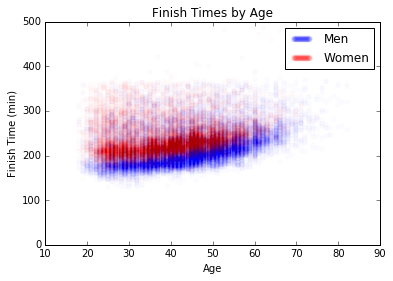

In [57]:
plt.scatter(model_df[model_df['gender']==True]['age'], y[model_df['gender']==True], alpha=0.01, color='b')
plt.scatter(model_df[model_df['gender']==False]['age'], y[model_df['gender']==False], alpha=0.01, color='r')
plt.legend(['Men','Women'], scatterpoints=200)
plt.title('Finish Times by Age')
plt.ylabel('Finish Time (min)')
plt.xlabel('Age')
plt.ylim(100, 500)
plt.ylim(0, 500)

Aging effect, looks like an elbow for both men/women.  Occurs around age 45-50

(0, 32000)

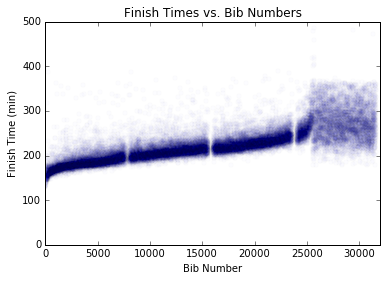

In [58]:
plt.scatter(model_df['bib'], y, alpha=0.01)
plt.title('Finish Times vs. Bib Numbers')
plt.ylabel('Finish Time (min)')
plt.xlabel('Bib Number')
plt.ylim(0, 500)
plt.xlim(0, 32000)

We can see all four waves.  The last wave includes runners who were admitted into the marathon by some method other than qualifying time.  This is really neat because the runners after bib# ~26000 are more representative of all marathon runners while runners before bib #~26000 are representative of good/serious marathon runners.

Ideas:
- Use non-qualifier data, build model for age/gender --> time.  Is this model better than qualifier model?
- Identify injuries, can we remove these guys?  (sudden slowdowns, different than just a slow runner)
    - Injured = True, should be more predictive

In [59]:
import numpy as np

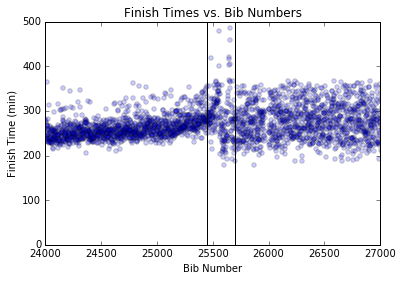

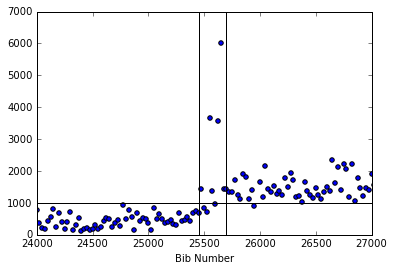

In [60]:
# plot of mean (by bins of 100) finish times
# Look for start of bib numbers containing non-qualifers
x = []
y_avg = []
y_var = []
for start in range(0,30000, 25):
    slice = (model_df['bib'] < start+25) & (model_df['bib'] >= start)
    x.append(start)
    y_avg.append(np.mean(y[slice]))
    y_var.append(np.var(y[slice]))

plt.scatter(model_df['bib'], y, alpha=0.2)
plt.title('Finish Times vs. Bib Numbers')
plt.ylabel('Finish Time (min)')
plt.xlabel('Bib Number')
plt.xlim(24000, 27000)
plt.ylim(0,500)
plt.plot((25450,25450),(0,500), 'k-')
plt.plot((25700,25700),(0,500), 'k-')
plt.show()
plt.scatter(x,y_var)
plt.xlabel('Bib Number')
plt.ylim(0)
plt.xlim(24000, 27000)
plt.plot((0,27000),(1000,1000), 'k-')
plt.plot((25450,25450),(0,10000), 'k-')
plt.plot((25700,25700),(0,10000), 'k-')
plt.show()


Dividing line between non-qualifiers and qualifiers appear to be ~25450.  We can spot this in the variance vs. bib bin.
What is going on between 25450-25700?  A lot of runners finishing late in this category.